In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import tifffile
from colicoords import Data, Cell, CellPlot

For this basic example we use the classes `Data`, `Cell` and `CellPlot`. First we will make a `Data` object which holds all data, this is then used to initiate a `Cell` object, and finally the `Cell` object is passed to `CellPlot`for plotting. The data is loaded using `tifffile`, but other functions can be used as long as they can be cast into a `numpy.ndarray`.

In [2]:
binary_img = tifffile.imread('data/01_binary.tif')
brightfield_img = tifffile.imread('data/01_brightfield.tif')
fluorescence_img = tifffile.imread('data/01_fluorescence.tif')
binary_img.shape, brightfield_img.shape, fluorescence_img.shape

((57, 61), (57, 61), (57, 61))

<IPython.core.display.Javascript object>


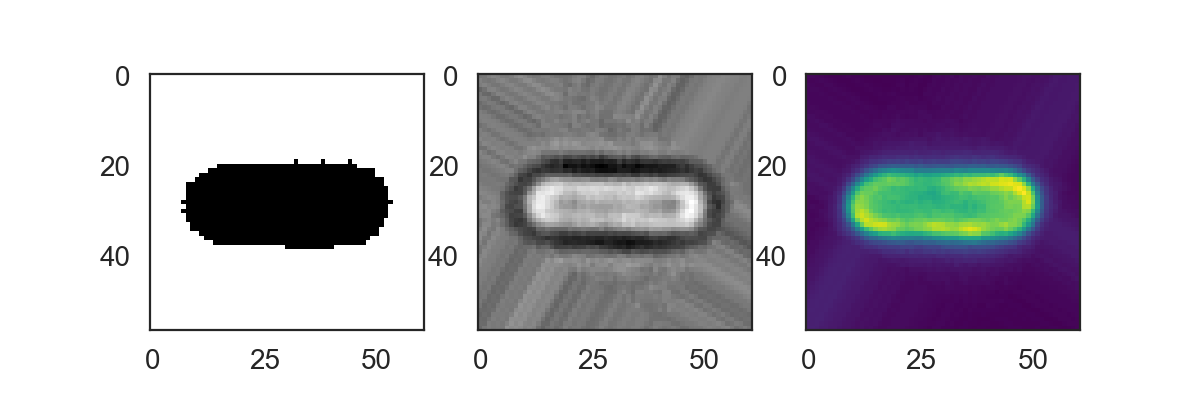

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(6, 2))
axes[0].imshow(binary_img, cmap='gray_r')
axes[1].imshow(brightfield_img, cmap='gray')
axes[2].imshow(fluorescence_img, cmap='viridis')

These images already have been rotated to be horizontally aligned, in another example it will be shown how `ColiCoords` can do this. It is required that both images have the same shape. The next step is to create a `Data` object and add the data. The first argument is the data, second argument the data class ('binary', 'fluorescence', 'brightfield' or 'storm') and optionally a name can be specified. If no name is given, the default name equal to its data class is used. In order to create a coordinate system a binary image is mandatory. 

In [4]:
data = Data()
data.add_data(binary_img, 'binary')
data.add_data(brightfield_img, 'brightfield')
data.add_data(fluorescence_img, 'fluorescence', name='flu_514')

In [5]:
cell = Cell(data)
cp = CellPlot(cell)

The resulting `Data` object is used to create a `Cell` object. The coordinate system is initialized based on initial guesses. The `Cell` object can be used to create a `CellPlot` objecet for easy convenient plotting and visualizations.

<IPython.core.display.Javascript object>


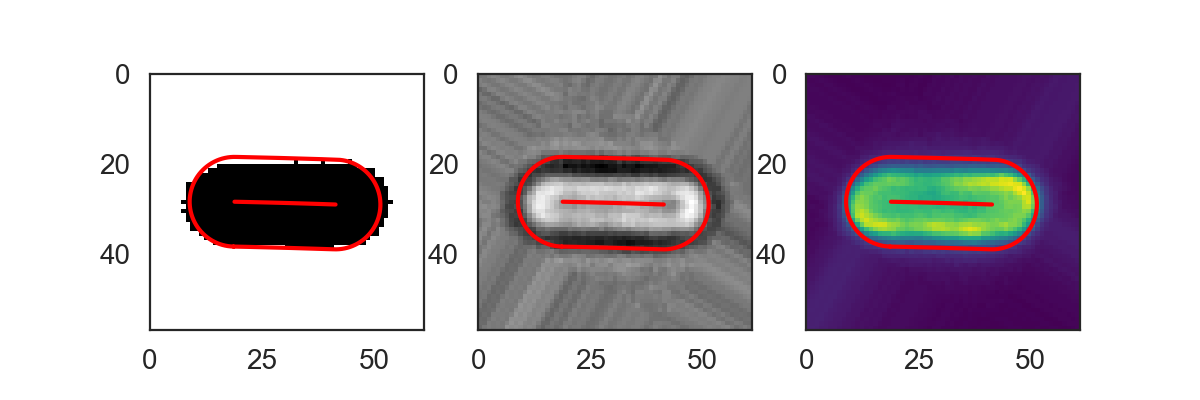

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(6, 2))
cp.imshow('binary', ax=axes[0])
cp.plot_outline(ax=axes[0])
cp.plot_midline(ax=axes[0])

cp.imshow('brightfield', ax=axes[1])
cp.plot_outline(ax=axes[1])
cp.plot_midline(ax=axes[1])

cp.imshow('flu_514', ax=axes[2])
cp.plot_outline(ax=axes[2])
cp.plot_midline(ax=axes[2])

The `CellPlot.imshow` is equal to `plt.imshow` with the exception that some default keyword arguments are provided. The most important one is `extent` which ensures that the top left corder of the top left pixel is at (0, 0), equivalent to ImageJ, and contrary to the default `Matplotlib` behaviour. 
The red lines show the cell midline as well as the outline, which is the isodistance line with distance `r` from the midline. This current coordinate system based on initial guesses from the binary image and can be optimize for a more accurate result. 

<IPython.core.display.Javascript object>


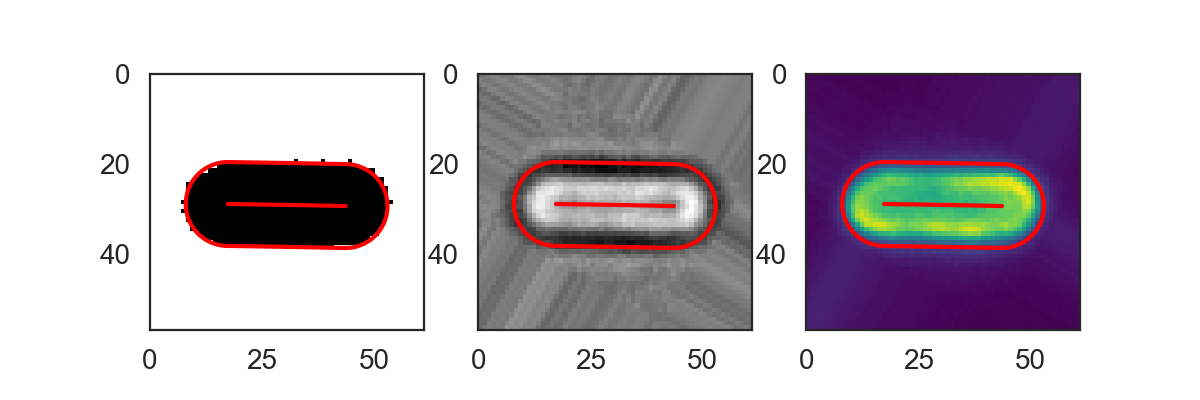

In [7]:
cell.optimize()

fig, axes = plt.subplots(1, 3, figsize=(6, 2))
cp.imshow('binary', ax=axes[0])
cp.plot_outline(ax=axes[0])
cp.plot_midline(ax=axes[0])

cp.imshow('brightfield', ax=axes[1])
cp.plot_outline(ax=axes[1])
cp.plot_midline(ax=axes[1])

cp.imshow('flu_514', ax=axes[2])
cp.plot_outline(ax=axes[2])
cp.plot_midline(ax=axes[2])

Calling `Cell.optimize()` executes the default optimization process based on the binary image. Since our `CellPlot` object carries a reference the the `Cell` object, we do not need to make a new `CellPlot` object to see the changes. As can be seen from the image the coordinate system now more accurately describes the binary image. <br>
If this does not provide an accurate enough coordinate system the fluorescence image can also be used as an optimization source. The only restraints for the input image is a isotropic signal throughout the whole body of the cell, which means that also brightfield images can be used.

<IPython.core.display.Javascript object>


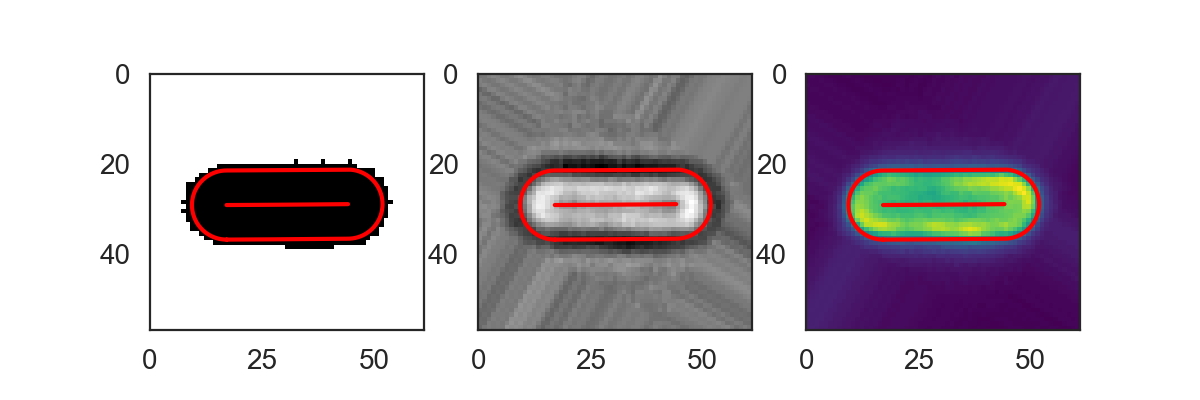

In [8]:
cell.optimize('flu_514')
cell.measure_r('flu_514', mode='mid')

fig, axes = plt.subplots(1, 3, figsize=(6, 2))
cp.imshow('binary', ax=axes[0])
cp.plot_outline(ax=axes[0])
cp.plot_midline(ax=axes[0])

cp.imshow('brightfield', ax=axes[1])
cp.plot_outline(ax=axes[1])
cp.plot_midline(ax=axes[1])

cp.imshow('flu_514', ax=axes[2])
cp.plot_outline(ax=axes[2])
cp.plot_midline(ax=axes[2])

By calling `cell.optimize()` with the name of a given data element as argument the cells' coordinate system is optimized by using that data class' default method. This particular method for brightfield and fluorescence data classes does not measure the radius of the cell. Therefore, the second line is called to calculate the value for `r` based on the radial distribution of singal in the given data element. Here, the keyword argument `mode='mid'` is supplied, which means that the returned `r` value is at the half-maximum of fluorescence intensity. Other options for `mode` are `'max'` or `'min'`.

<IPython.core.display.Javascript object>


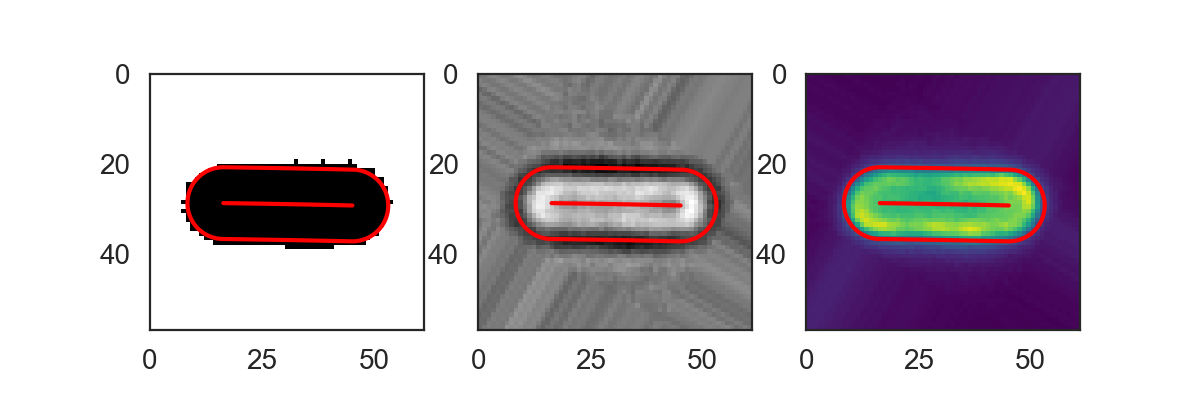

In [9]:
cell.optimize('brightfield')
cell.measure_r('brightfield', mode='min')

fig, axes = plt.subplots(1, 3, figsize=(6, 2))
cp.imshow('binary', ax=axes[0])
cp.plot_outline(ax=axes[0])
cp.plot_midline(ax=axes[0])

cp.imshow('brightfield', ax=axes[1])
cp.plot_outline(ax=axes[1])
cp.plot_midline(ax=axes[1])

cp.imshow('flu_514', ax=axes[2])
cp.plot_outline(ax=axes[2])
cp.plot_midline(ax=axes[2])

## Plotting and measurements

With the desired coordinate system in place we can get geometrical measurements derived from it. In `ColiCoords` all interal units are in pixels. See the documentation on `ColiCoords` configurarion for more information.

In [10]:
cell.radius, cell.length, cell.circumference, cell.area, cell.surface, cell.volume

(8,
 28.792852332235377,
 107.85119080095897,
 661.7475671455128,
 2251.5343331245294,
 7933.807040072801)

The above call returns the cells radius (pixels), length (pixels), circumference (total outline length in 2D plane, pixels), area (in 2D plane, pixels$^2$), surface (total cell outside surface area, pixels$^2$), and volume (pixels$^3$).

To get the mean pixel intensity of the cell object `get_intensity()` can be used. By default, the binary image is used as mask and the mean pixel value of the masked image is returned. If the user specifies `mask='coords'` the mean pixel intensity of the pixels within the cell outline is returned. 

In [11]:
print(cell.get_intensity())
print(cell.get_intensity(mask='coords'))

27578.16
29944.037


Finally, to plot the radial distribution of the cell:

<IPython.core.display.Javascript object>


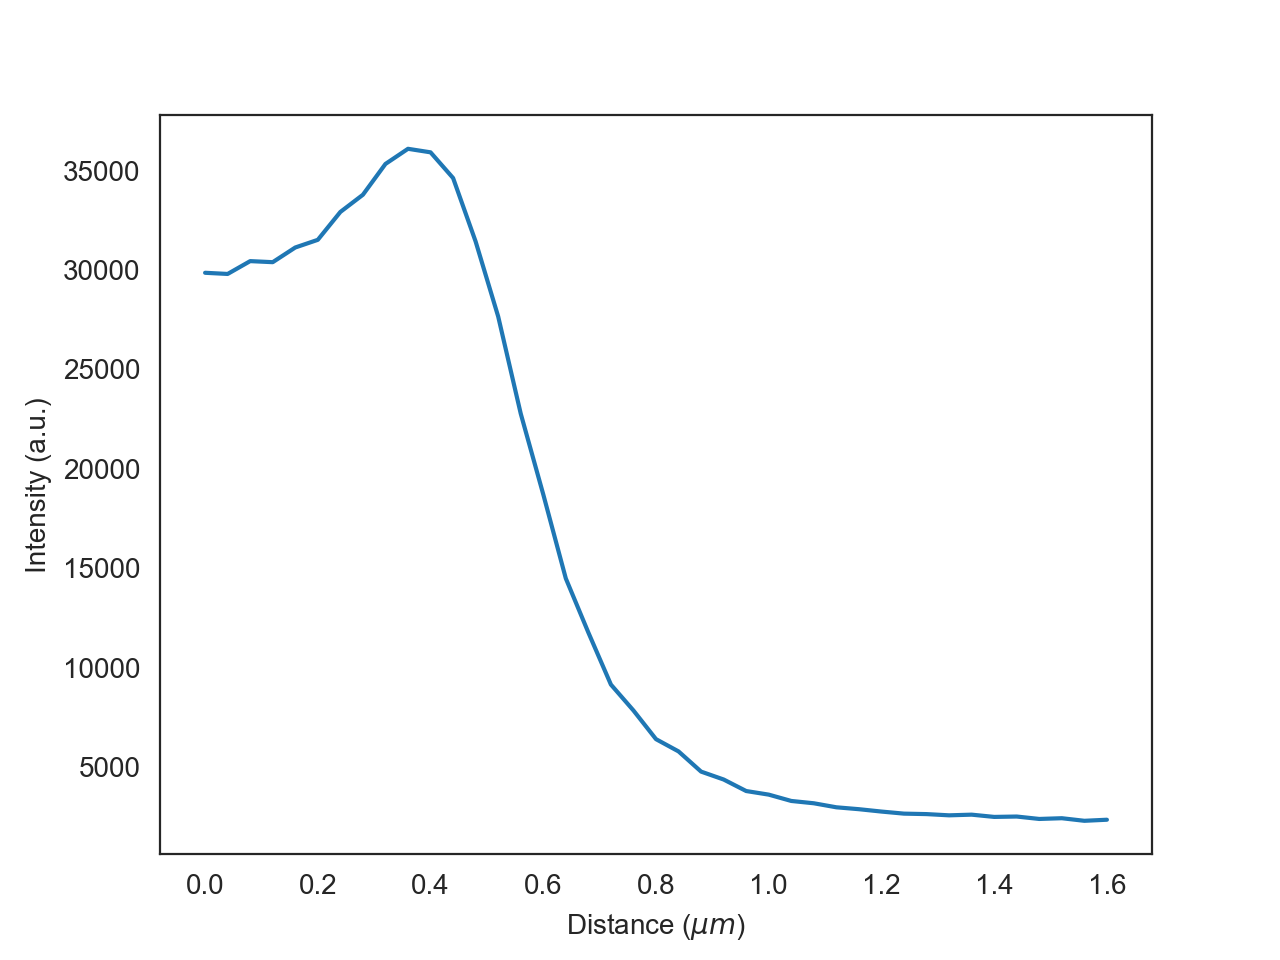

In [12]:
plt.figure()
cp.plot_r_dist()

Again, `CellPlot` fills out default plotting options such as step size and method of obtaining the radial distribution. Details can be found in the API docs. 